In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
# https://drive.google.com/file/d/1BoMmXX1A0bc-inv1QK19Ci6L-r96iXjv/view?usp=sharing
with zipfile.ZipFile('/content/drive/MyDrive/Colab_Notebooks/Chicken-fecal-images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab_Notebooks/extracted_files')

import glob
fol=glob.glob('/content/drive/MyDrive/Colab_Notebooks/extracted_files/Chicken-fecal-images/*')
fol

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/Colab_Notebooks/extracted_files/Chicken-fecal-images/Coccidiosis',
 '/content/drive/MyDrive/Colab_Notebooks/extracted_files/Chicken-fecal-images/Healthy']

In [56]:
!pip install split-folders
from splitfolders import ratio
import splitfolders

In [57]:
import splitfolders
input_data = '/content/drive/MyDrive/Colab_Notebooks/extracted_files/Chicken-fecal-images/'
output_data = '/content/drive/MyDrive/Colab_Notebooks/extracted_files/output'
splitfolders.ratio(input=input_data, output=output_data, seed=1337, ratio=(.7, 0.15,0.15))

Copying files: 390 files [00:07, 53.14 files/s]


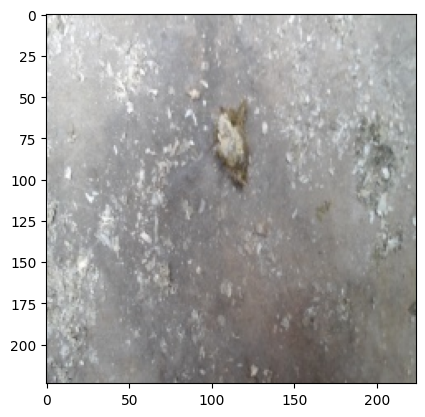

In [58]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the image using PIL
image = Image.open('/content/drive/MyDrive/Colab_Notebooks/extracted_files/output/test/Healthy/healthy.4.jpg')

# Display the image using matplotlib
plt.imshow(image)
plt.show()

In [59]:
image.size

(224, 224)

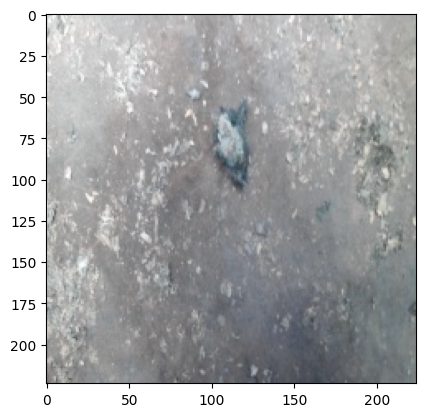

In [60]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/extracted_files/output/test/Healthy/healthy.4.jpg')
img.shape
plt.imshow(img)

# this is for to data gen coz we have less data

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [62]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 90,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   shear_range = 0.2
                                   )

In [63]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
train_data = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/Colab_Notebooks/extracted_files/output/train',
                                             target_size=(224,224))

Found 272 images belonging to 2 classes.


In [65]:
test_data = test_datagen.flow_from_directory(directory='/content/drive/MyDrive/Colab_Notebooks/extracted_files/output/test',
                                             target_size=(224,224))

Found 60 images belonging to 2 classes.


In [66]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [67]:
val_data = val_datagen.flow_from_directory(directory='/content/drive/MyDrive/Colab_Notebooks/extracted_files/output/val',
                                             target_size=(224,224))

Found 58 images belonging to 2 classes.


# start modell building

In [68]:
from keras.applications.vgg16 import VGG16

In [69]:
model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [70]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# here we need to add our dense and flatteren layer and

In [71]:
import tensorflow as tf

In [72]:
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [73]:
for layer in model.layers:
  layer.trainable = False

In [74]:
x = Flatten()(model.output)

In [75]:

# Add a Dense layer for binary classification (2 classes)
x = Dense(2, activation='softmax')(x)

In [76]:
from tensorflow.keras.models import Model

In [77]:
model = Model(inputs=model.input, outputs=x)

In [78]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Add early stopping and call backs

In [79]:
# prompt: import Modelcheckpoint earlystopping ReduceLROnPlateau

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [80]:
model_check = ModelCheckpoint(
    filepath = 'model.keras',
    monitor = 'accuracy',
    verbose = 1,
    save_best_only = True,
    save_weights_only=False

)

early_stopping = EarlyStopping(
    monitor = 'accuracy',
    patience =3,
    verbose = 1,
    restore_best_weights = True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.0001
)

# train the model

In [81]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [82]:
model_history = model.fit(
    train_data,
    epochs = 10,
    validation_data = val_data,
    callbacks = [model_check,early_stopping,reduce_lr]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.5289 - loss: 1.2092
Epoch 1: accuracy improved from -inf to 0.58088, saving model to model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 687ms/step - accuracy: 0.5341 - loss: 1.1896 - val_accuracy: 0.8793 - val_loss: 0.4072 - learning_rate: 0.0010
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.8218 - loss: 0.4069
Epoch 2: accuracy improved from 0.58088 to 0.82721, saving model to model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - accuracy: 0.8224 - loss: 0.4022 - val_accuracy: 0.9310 - val_loss: 0.3414 - learning_rate: 0.0010
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.9314 - loss: 0.1919
Epoch 3: accuracy improved from 0.82721 to 0.94485, saving model to model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.9328 - loss: 0.1933 - val_accuracy: 0.9310 - val_loss: 0.3231 - learning_rate: 0.0010
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9457 - loss: 0.1463
Epoch 4: accuracy d

In [83]:
# Assuming your model is already trained

# Evaluate on the training set
train_loss, train_accuracy = model.evaluate(train_data, verbose=0)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_data, verbose=0)

# Print the results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")



Training Accuracy: 97.43%
Testing Accuracy: 98.33%


# Test the model

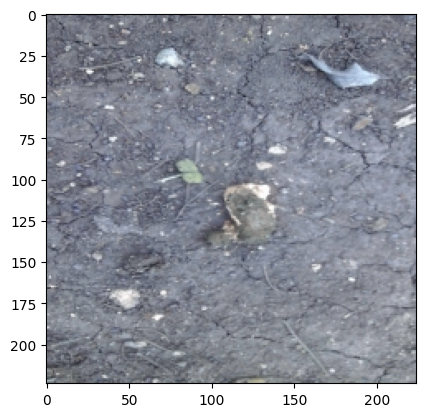

In [101]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/extracted_files/Chicken-fecal-images/Healthy/healthy.0.jpg')
plt.imshow(img)
plt.show()

In [102]:
x = img/255.0
x.shape

(224, 224, 3)

In [103]:
x = x.reshape(1,224,224,3)

In [104]:
x.shape

(1, 224, 224, 3)

In [105]:
# from tensorflow.keras.models import load_model
# pred_model = load_model()

In [106]:
test_pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [107]:
test_pred

array([[0.00154394, 0.998456  ]], dtype=float32)

In [108]:
aa = np.argmax(test_pred)
if aa == 0:
  print('Coccidiosis')
else:
  print('healthy')

healthy
